In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
def generate_accuracy_and_heatmap(model, x, y):
    ac = metrics.accuracy_score(y, model.predict(x))
    f_score = metrics.f1_score(y, model.predict(x))
    
    print("Accuracy: ", ac)
    print("F1 score: ", f_score)
    print("\n")
    print(pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                     pd.Series(y['Outcome'], name='Actual')))
    return 1

In [3]:
data = pd.read_csv("../datasets/framingham_heart_study.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.shape

(4240, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
pd.isnull(data).values.any()

True

In [9]:
pd.isnull(data).values.sum()

645

In [10]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# new_data = data.dropna()
new_data = data.fillna(method='bfill', axis=0) # replacing missing values with value in next row
# new_data = data.fillna(method='bfill', axis=0) # replacing missing values with the mean

In [12]:
pd.isnull(new_data).values.sum()

0

In [13]:
new_data.shape

(4240, 16)

In [14]:
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


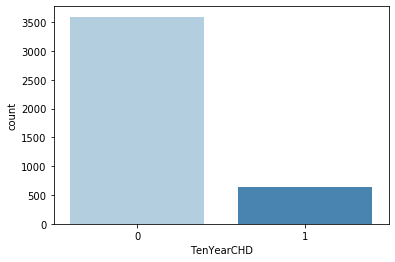

In [15]:
# target variable counts
sns.countplot(x="TenYearCHD", data=new_data, palette="Blues")

In [16]:
# confirming the numbe of samples in each class because there is a class imbalance
new_data["TenYearCHD"].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

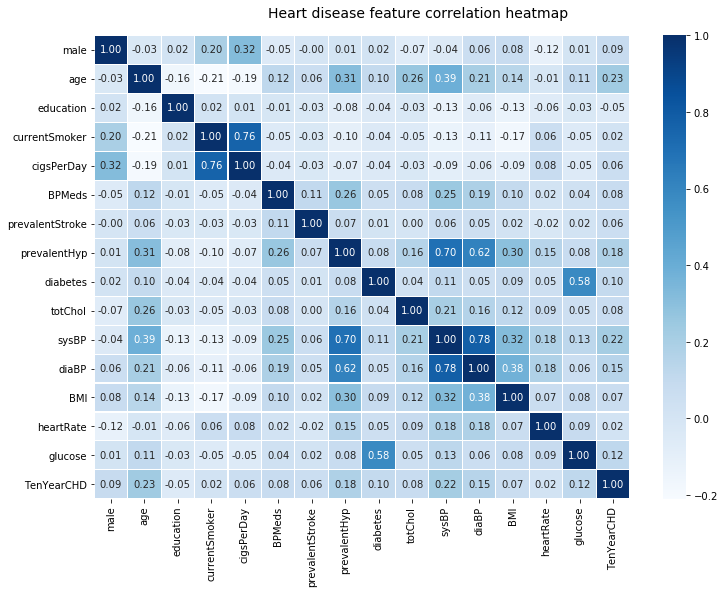

In [17]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [18]:
# separating X and y variables
X = new_data.drop(['TenYearCHD'], axis=1)
y = new_data['TenYearCHD']

In [19]:
X.shape, y.shape

((4240, 15), (4240,))

In [20]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,107.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [21]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [22]:
# separating the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
# Decision Tree classifier
classifier = DecisionTreeClassifier()

In [24]:
# fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# predicting the outcome for testing data
y_pred = classifier.predict(X_test)

In [26]:
# measuring prediction accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7610062893081762


In [27]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1094
           1       0.23      0.27      0.25       178

    accuracy                           0.77      1272
   macro avg       0.55      0.56      0.56      1272
weighted avg       0.79      0.77      0.78      1272



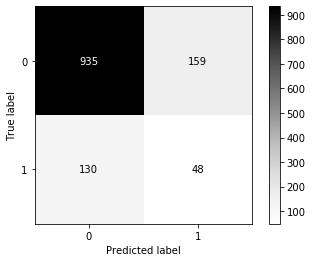

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys")  # doctest: +SKIP

In [29]:
# oversampling with SMOTE to avoid overfitting the model
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [30]:
print("After oversampling, shape of train x: ", X_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5004, 15)
After oversampling, shape of train y:  (5004,)


In [31]:
# fitting svm classifier after oversampling
classifier.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [32]:
y_pred_res = classifier.predict(X_test)

In [33]:
# model accuracy after class is balanced (accuracy reduces to 75%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_res))
print("***************************************************")
print(classification_report(y_test, y_pred_res))

Accuracy: 0.7067610062893082
***************************************************
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1094
           1       0.14      0.21      0.17       178

    accuracy                           0.71      1272
   macro avg       0.50      0.50      0.49      1272
weighted avg       0.76      0.71      0.73      1272



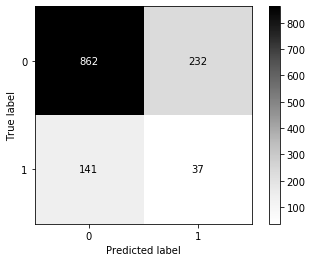

In [34]:
plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys")

In [35]:
# feature selection with recursive feature elimination with cross validation

In [36]:
rfe_cv = RFECV(estimator=classifier, step=1, cv=10, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train_res, y_train_res)

In [37]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train_res.columns[rfe_cv.support_])

Optimal number of features:  10
Best features:  Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


In [38]:
rfe_cv.grid_scores_

array([0.82661357, 0.82901916, 0.78981876, 0.8142008 , 0.82038363,
       0.81898762, 0.82218323, 0.82937285, 0.82037725, 0.83377485,
       0.82997964, 0.82598124, 0.83197924, 0.82737964, 0.82618084])

In [39]:
rfe_cv.ranking_

array([5, 1, 1, 1, 1, 2, 6, 3, 4, 1, 1, 1, 1, 1, 1])

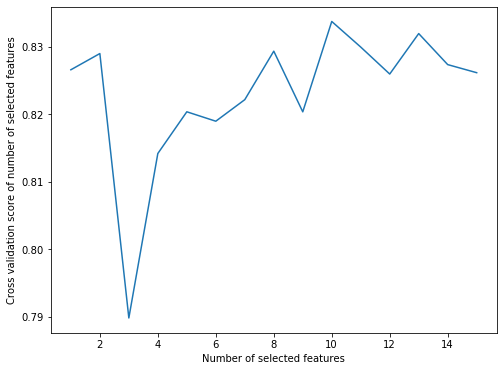

In [40]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfe_cv.grid_scores_)+1), rfe_cv.grid_scores_)
plt.show()

In [41]:
# transform the newly selected features
x_train_rfecv = rfe_cv.transform(X_train_res)
x_test_rfecv = rfe_cv.transform(X_test)

In [42]:
dt_rfecv_model = classifier.fit(x_train_rfecv, y_train_res)

In [43]:
# # new selected features 
# new_selected_data = new_data[['age', 'education', 'currentSmoker', 'cigsPerDay', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']]

In [44]:
# new_selected_data.shape

In [45]:
# sns.countplot(x="TenYearCHD", data=new_selected_data, palette="Blues")

In [51]:
# generate_accuracy_and_heatmap(dt_rfecv_model, x_test_rfecv, y_test)

In [48]:
y_pred_rfecv = classifier.predict(x_test_rfecv)

In [49]:
# model accuracy after class is balanced (accuracy reduces to 75%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfecv))
print("***************************************************")
print(classification_report(y_test, y_pred_rfecv))

Accuracy: 0.7444968553459119
***************************************************
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1094
           1       0.17      0.21      0.19       178

    accuracy                           0.74      1272
   macro avg       0.52      0.52      0.52      1272
weighted avg       0.77      0.74      0.76      1272



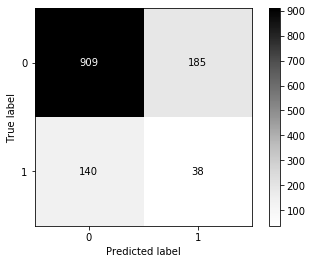

In [50]:
plot_confusion_matrix(dt_rfecv_model, x_test_rfecv, y_test, cmap="Greys")